In [78]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    AutoARIMA,
    VARIMA,
    ExponentialSmoothing,
    Theta
)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset


In [1]:
print('hello')

hello


In [3]:
pd.set_option('display.max_columns', None)

In [20]:
df = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\Capstone\PANYNJ-codebase\pax_ts.csv')
df.head()

,Unnamed: 0,date,total_doses,holiday,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,seats_tr,seats_lc,seats_lc_afr,seats_lc_asi,seats_lc_can,seats_lc_eur,seats_lc_lac,seats_lc_midwest,seats_lc_northeast,seats_lc_west,seats_lc_plains,seats_lc_southeast,seats_tr_afr,seats_tr_asi,seats_tr_can,seats_tr_eur,seats_tr_lac,seats_tr_midwest,seats_tr_northeast,seats_tr_west,seats_tr_plains,seats_tr_southeast,pax_intl_bus,pax_intl_lei,pax_dom_bus,pax_dom_lei,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl,pax_intl_bus__t-10,pax_intl_lei__t-10,pax_dom_bus__t-10,pax_dom_lei__t-10,pax_B1_dom__t-10,pax_B2_dom__t-10,pax_B3_dom__t-10,pax_B1_intl__t-10,pax_B2_intl__t-10,pax_B3_intl__t-10,pax_intl_bus__t-20,pax_intl_lei__t-20,pax_dom_bus__t-20,pax_dom_lei__t-20,pax_B1_dom__t-20,pax_B2_dom__t-20,pax_B3_dom__t-20,pax_B1_intl__t-20,pax_B2_intl__t-20,pax_B3_intl__t-20,pax_intl_bus__t-30,pax_intl_lei__t-30,pax_dom_bus__t-30,pax_dom_lei__t-30,pax_B1_dom__t-30,pax_B2_dom__t-30,pax_B3_dom__t-30,pax_B1_intl__t-30,pax_B2_intl__t-30,pax_B3_intl__t-30,pax_intl_bus__t-40,pax_intl_lei__t-40,pax_dom_bus__t-40,pax_dom_lei__t-40,pax_B1_dom__t-40,pax_B2_dom__t-40,pax_B3_dom__t-40,pax_B1_intl__t-40,pax_B2_intl__t-40,pax_B3_intl__t-40,pax_intl_bus__t-50,pax_intl_lei__t-50,pax_dom_bus__t-50,pax_dom_lei__t-50,pax_B1_dom__t-50,pax_B2_dom__t-50,pax_B3_dom__t-50,pax_B1_intl__t-50,pax_B2_intl__t-50,pax_B3_intl__t-50,pax_intl_bus__t-60,pax_intl_lei__t-60,pax_dom_bus__t-60,pax_dom_lei__t-60,pax_B1_dom__t-60,pax_B2_dom__t-60,pax_B3_dom__t-60,pax_B1_intl__t-60,pax_B2_intl__t-60,pax_B3_intl__t-60,pax_intl_bus__t-70,pax_intl_lei__t-70,pax_dom_bus__t-70,pax_dom_lei__t-70,pax_B1_dom__t-70,pax_B2_dom__t-70,pax_B3_dom__t-70,pax_B1_intl__t-70,pax_B2_intl__t-70,pax_B3_intl__t-70,pax_intl_bus__t-80,pax_intl_lei__t-80,pax_dom_bus__t-80,pax_dom_lei__t-80,pax_B1_dom__t-80,pax_B2_dom__t-80,pax_B3_dom__t-80,pax_B1_intl__t-80,pax_B2_intl__t-80,pax_B3_intl__t-80,pax_intl_bus__t-90,pax_intl_lei__t-90,pax_dom_bus__t-90,pax_dom_lei__t-90,pax_B1_dom__t-90,pax_B2_dom__t-90,pax_B3_dom__t-90,pax_B1_intl__t-90,pax_B2_intl__t-90,pax_B3_intl__t-90,pax_intl_bus__t-100,pax_intl_lei__t-100,pax_dom_bus__t-100,pax_dom_lei__t-100,pax_B1_dom__t-100,pax_B2_dom__t-100,pax_B3_dom__t-100,pax_B1_intl__t-100,pax_B2_intl__t-100,pax_B3_intl__t-100,pax_intl_bus__t-110,pax_intl_lei__t-110,pax_dom_bus__t-110,pax_dom_lei__t-110,pax_B1_dom__t-110,pax_B2_dom__t-110,pax_B3_dom__t-110,pax_B1_intl__t-110,pax_B2_intl__t-110,pax_B3_intl__t-110,pax_intl_bus__t-120,pax_intl_lei__t-120,pax_dom_bus__t-120,pax_dom_lei__t-120,pax_B1_dom__t-120,pax_B2_dom__t-120,pax_B3_dom__t-120,pax_B1_intl__t-120,pax_B2_intl__t-120,pax_B3_intl__t-120,pax_intl_bus__t-130,pax_intl_lei__t-130,pax_dom_bus__t-130,pax_dom_lei__t-130,pax_B1_dom__t-130,pax_B2_dom__t-130,pax_B3_dom__t-130,pax_B1_intl__t-130,pax_B2_intl__t-130,pax_B3_intl__t-130,pax_intl_bus__t-140,pax_intl_lei__t-140,pax_dom_bus__t-140,pax_dom_lei__t-140,pax_B1_dom__t-140,pax_B2_dom__t-140,pax_B3_dom__t-140,pax_B1_intl__t-140,pax_B2_intl__t-140,pax_B3_intl__t-140,pax_intl_bus__t-150,pax_intl_lei__t-150,pax_dom_bus__t-150,pax_dom_lei__t-150,pax_B1_dom__t-150,pax_B2_dom__t-150,pax_B3_dom__t-150,pax_B1_intl__t-150,pax_B2_intl__t-150,pax_B3_intl__t-150,pax_intl_bus__t-160,pax_intl_lei__t-160,pax_dom_bus__t-160,pax_dom_lei__t-160,pax_B1_dom__t-160,pax_B2_dom__t-160,pax_B3_dom__t-160,pax_B1_intl__t-160,pax_B2_intl__t-160,pax_B3_intl__t-160,pax_intl_bus__t-170,pax_intl_lei__t-170,pax_dom_bus__t-170,pax_dom_lei__t-170,pax_B1_dom__t-170,pax_B2_dom__t-170,pax_B3_dom__t-170,pax_B1_intl__t-170,pax_B2_intl__t-170,pax_B3_intl__t-170,pax_intl_bus__t-180,pax_intl_lei__t-180,pax_dom_bus__t-180,pax_dom_lei__t-180,pax_B1_dom__t-180,pax_B2_dom__t-180,pax_B3_dom__t-180,pax_B1_intl__t-180,pax_B2_intl__t-180,pax_B3_intl__t-180,pax_intl_bus__t-190,pax_intl_lei__t-190,pax_dom_bus__t-190,pax_dom_lei__t-190,pax_B1_dom__t-190,pax_B2_dom__t-190,pax_B3

In [21]:
df.rename({'Unnamed: 0':'ts10'},axis=1,inplace=True)
df['ts10'] = pd.to_datetime(df['ts10'])
df.set_index('ts10',inplace=True)
df = df.iloc[:,:-300]
df = df.drop('date',axis=1)
df.head()

,total_doses,holiday,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,seats_tr,seats_lc,seats_lc_afr,seats_lc_asi,seats_lc_can,seats_lc_eur,seats_lc_lac,seats_lc_midwest,seats_lc_northeast,seats_lc_west,seats_lc_plains,seats_lc_southeast,seats_tr_afr,seats_tr_asi,seats_tr_can,seats_tr_eur,seats_tr_lac,seats_tr_midwest,seats_tr_northeast,seats_tr_west,seats_tr_plains,seats_tr_southeast,pax_intl_bus,pax_intl_lei,pax_dom_bus,pax_dom_lei,pax_B1_dom,pax_B2_dom,pax_B3_dom,pax_B1_intl,pax_B2_intl,pax_B3_intl
ts10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:10:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:20:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:30:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:40:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
targets = df.iloc[:,-10:]
covariates = df.iloc[:,:-10]

,total_doses,holiday,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,tod_Afternoon,tod_Evening,tod_Morning,tod_Overnight,seats_tr,seats_lc,seats_lc_afr,seats_lc_asi,seats_lc_can,seats_lc_eur,seats_lc_lac,seats_lc_midwest,seats_lc_northeast,seats_lc_west,seats_lc_plains,seats_lc_southeast,seats_tr_afr,seats_tr_asi,seats_tr_can,seats_tr_eur,seats_tr_lac,seats_tr_midwest,seats_tr_northeast,seats_tr_west,seats_tr_plains,seats_tr_southeast
ts10,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:10:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:20:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:30:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 00:40:00,4438527,1,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cov = TimeSeries.from_dataframe(covariates)
tar = TimeSeries.from_dataframe(targets)

In [38]:
sc_cov = Scaler()
cov_sc = sc_cov.fit_transform(cov)

sc_tar = Scaler()
tar_sc = sc_tar.fit_transform(tar)

In [58]:
cov_sc[.8]

2022-07-06 18:19:46 darts.timeseries ERROR: IndexError: The type of your index was not matched.


IndexError: The type of your index was not matched.

In [61]:
cov_train, cov_test = cov_sc.split_before(pd.Timestamp(2021,12,1))
tar_train, tar_test = tar_sc.split_before(pd.Timestamp(2021,12,1))

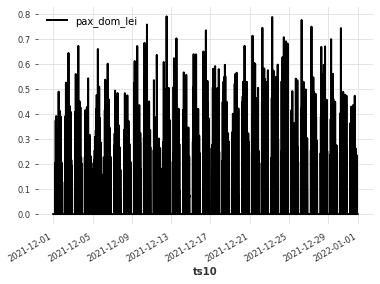

In [86]:
tar_test['pax_dom_lei'].plot()

In [109]:
#input chunk length corresponds to 2 weeks, output chunk corresponds to 1 week
model_cov = BlockRNNModel(
    model="LSTM",
    input_chunk_length=2016,
    output_chunk_length=1008,
    n_epochs=5
)

In [113]:
model_cov.fit(
    series=tar_train,
    past_covariates= cov_train,
    verbose=True,
)

2022-07-06 19:13:20 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 45073 samples.
2022-07-06 19:13:20 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-07-06 19:13:20 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-06 19:13:20 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-06 19:13:20 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-07-06 19:13:20 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 7.2 K 
4 | fc            | Sequential       | 262 K 
---------------------------------------------------
269 K     Trainable params
0       

Epoch 4: 100%|██████████| 1409/1409 [26:28<00:00,  1.13s/it, loss=0.00436, train_loss=0.00447]


In [115]:
pred = model_cov.predict(len(tar_test), series=tar_train, past_covariates=cov_sc)

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, -2103.98it/s]  


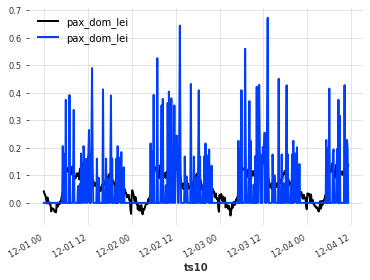

In [122]:
pred['pax_dom_lei'][:500].plot()
tar_test['pax_dom_lei'][:500].plot()

In [119]:
res_smape = smape(tar_test['pax_dom_lei'], pred['pax_dom_lei'])
print(res_smape)

172.91990596013517


In [ ]:
# with such sparse schedule data, I might need to create larger aggregations, e.g. domestic/international instead of by region, and even aggregate into 30-minute time periods
# check to see how sparse the data actually is, especially the target variables
# it might end up being better to treat the flight schedule data as a supervised learning problem instead of time series. Can still use deep learning, but not as a time series
# Yuki's and Alex's analysis should definitely be able to use time series though

In [127]:
#nearly 80% of the rows are empty for domestic flights
targets[targets['pax_dom_lei'] == 0].shape[0] / targets.shape[0]

0.7849885844748858

In [129]:
# more than 90% are empty for international flights
targets[targets['pax_intl_bus'] == 0].shape[0] / targets.shape[0]

0.9124429223744293

In [83]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.utils.utils import SeasonalityMode

In [87]:
m_theta = Theta(season_mode= SeasonalityMode.ADDITIVE)
m_theta.fit(tar_train['pax_dom_lei'])

In [88]:
pred = m_theta.predict(len(tar_test['pax_dom_lei']))

In [105]:
res_smape = smape(tar_test['pax_dom_lei'], pred)
print(res_smape)

188.95976929176425


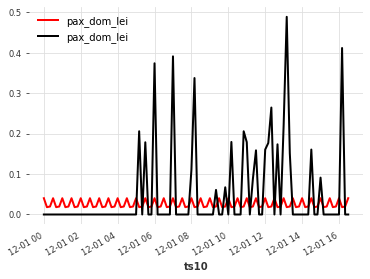

In [108]:
pred[:100].plot(c='r')
tar_test[:100]['pax_dom_lei'].plot()